In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
prev_path = "\\".join(list(os.getcwd().split('\\')[0:-1]))
if module_path not in sys.path: sys.path.append(prev_path)

from optimization.models.portfolio import MarkowitzPortfolio, generate_portfolio_data

In [5]:
m = np.array([0.0720, 0.1552, 0.1754, 0.0898, 0.4290, 0.3929, 0.3217, 0.1838])
s = np.array([[0.0946, 0.0374, 0.0349, 0.0348, 0.0542, 0.0368, 0.0321, 0.0327],
              [0.0374, 0.0775, 0.0387, 0.0367, 0.0382, 0.0363, 0.0356, 0.0342],
              [0.0349, 0.0387, 0.0624, 0.0336, 0.0395, 0.0369, 0.0338, 0.0243],
              [0.0348, 0.0367, 0.0336, 0.0682, 0.0402, 0.0335, 0.0436, 0.0371],
              [0.0542, 0.0382, 0.0395, 0.0402, 0.1724, 0.0789, 0.0700, 0.0501],
              [0.0368, 0.0363, 0.0369, 0.0335, 0.0789, 0.0909, 0.0536, 0.0449],
              [0.0321, 0.0356, 0.0338, 0.0436, 0.0700, 0.0536, 0.0965, 0.0442],
              [0.0327, 0.0342, 0.0243, 0.0371, 0.0501, 0.0449, 0.0442, 0.0816]
              ])

training_sample, testing_sample = generate_portfolio_data(mu=m, cov=s, training_size=3000, testing_size=500)

make a MarkowitzPortfolio object

In [7]:
model = MarkowitzPortfolio(training_sample)

estimate a model based on a volatility constrain allowing short selling and print:
* mean
* vol
* weights


In [8]:
model.estimate_model(optimization_type="VOLCONSTRAINT", constraint=0.22, allow_short_selling=True)
print(model.mu_p)
print(model.vol_p)
print(model.weights)

0.2731617406223337
0.22000000000000014
[[-0.03201011]
 [ 0.11346491]
 [ 0.30113059]
 [-0.01375197]
 [ 0.00636634]
 [ 0.33063051]
 [ 0.15557937]
 [ 0.13859037]]


look whether the model is on the efficient frontier

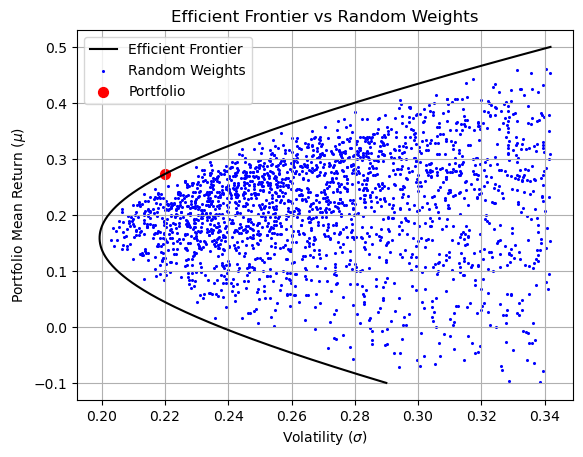

In [9]:
model.efficient_frontier()

estimate model of mean constraint

0.4500000000000002
0.30971555941690937
[[-0.25900296]
 [ 0.09101065]
 [ 0.28991193]
 [-0.30013069]
 [ 0.12940369]
 [ 0.66087018]
 [ 0.34195834]
 [ 0.04597886]]


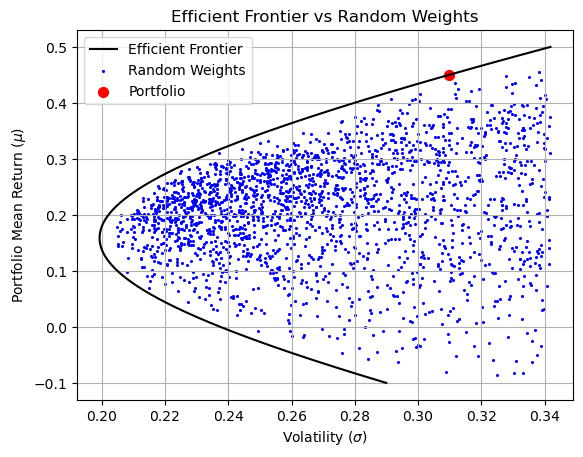

In [10]:
model.estimate_model(optimization_type="MEANCONSTRAINT", constraint=0.45, allow_short_selling=True)
print(model.mu_p)
print(model.vol_p)
print(model.weights)
model.efficient_frontier()

now without short selling, see that the portfolio becomes "theoretically" not efficient

0.4000000000000001
0.30456446145002447
[[0.00000000e+00]
 [9.36395785e-17]
 [3.54830020e-17]
 [0.00000000e+00]
 [2.65177712e-01]
 [7.34822288e-01]
 [0.00000000e+00]
 [0.00000000e+00]]


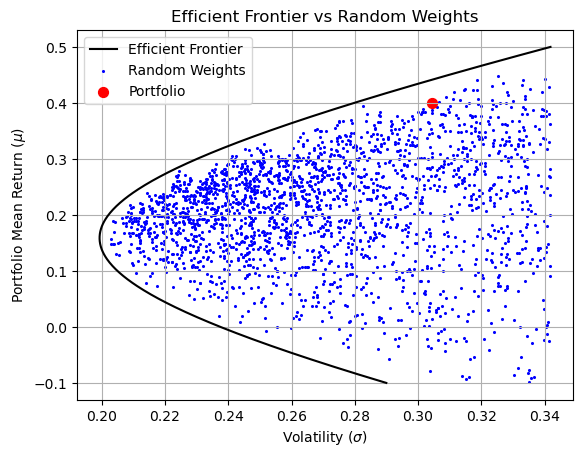

In [11]:
model.estimate_model(optimization_type="MEANCONSTRAINT", constraint=0.4, allow_short_selling=False)
print(model.mu_p)
print(model.vol_p)
print(model.weights)
model.efficient_frontier()

trail run for backtesting

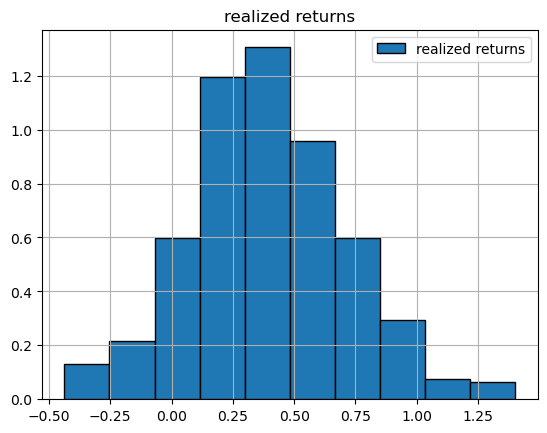

Mean Realized Returns: 0.394836
Volatility Realized Returns: 0.31902


In [13]:
model.backtests(training_sample=training_sample, testing_sample=testing_sample, constraint=0.4,
                optimization_type="MEANCONSTRAINT", allow_short_selling=False)